## This is the solution to the first excercise sheet in the course IANNSTF
### Group: Phummel, Kgroß

#### Excercise 1:   
Videos

#### Excercise 2 Part 1:
Task: Write down the function of the specified network.  
We adopt the convention that weight $w_{ij}$ is the connection weight of neuron $j$ to neuron $i$. This is common in the literature. See for example the originial Hinton Paper on Gradient Descent (found here: http://www.dtic.mil/docs/citations/ADA164453).
We first want to write the network function in sum notation. Therefore we need an even more complicated way of specifying which weight we talk about:
To specify the weight connecting the $j$th node of layer $k$ to the $i$th node of layer $k+1$ we write $w_{ij}^{k+1}$. We consider the input layer to be layer $0$.   
The activation of neuron $0$ in the first layer is then:
#### $ a_0^1 = \sigma(\sum\nolimits_{i=0}^4 x_i w_{0i}^1 )$   
The activation of neuron 0 in the second layer would therefore be:   
#### $ a_0^2 = \sigma(\sum\nolimits_{j=0}^3 a_j^1 w_{0j}^2) = \sigma(\sum\nolimits_{j=0}^3 \sigma(\sum\nolimits_{i=0}^4 x_i w_{ji}^1 ) w_{0j}^2)$

Clearly this becomes unreadable very quickly. Therefore we use the vector notation instead.

The sum notation is not only confusing to read, it also does not represent the network function in the way we would implement it. We would use fast linear algebra routines anyway, so here comes the vector notation:   
First we need again some definition. Since $w_{ij}^{k+1}$ represents the weight from neuron $j$ of layer $k$ to neuron $i$ of layer $k+1$, we use a matrix $W_{k+1}$ to denote all the weight from layer $k$ to layer $k+1$. This matrix should then have as many rows, as there are neurons in layer $k+1$ and as many columns as there are neurons in layer $k$, to be consistent with the commonly used notation for weights.  However to stick to the notations of the lecture we use the Transpose of this matrix. This means that for the specific network of this task $W_1$ will be $\in R^{4\times 3}$. Also we think of the weight vector \bar{x} as a row vector.   
Ok, so here comes activation of layer $1$:
#### $ a_1 = \sigma(xW_1^{T}) $
This gives us the activation of the first layer as a column vector. The whole network function is then:
## $ y = a_3 = \sigma(\bar{a_2} \bar{w_3}) = \sigma(\sigma(\bar{a_1} W_2) \bar{w_3}) = \sigma(\sigma(\sigma(\bar{x}^T W_1) W_2) \bar{w_3})$   
Ok, dimensionality check:   
$\bar{x} \in 4\times 1$, $W_1 \in 4 \times 3$ therefore $ \bar{a_1} = \bar{x}^T W_1 \in 1 \times 3 $   
$ \bar{a_2} = \bar{a_1} W2$, with $W_2 \in 3 \times 2$ therefore $ \bar{a_2} \in 1 \times 2$   
$ a_3 = \bar{a_2} \bar{w_3}$, with $\bar{w_3} \in 2 \times 1$ therefore $a_3 \in 1 \times 1$   
Exactly what we wanted.

#### Excercise 2 Part 2:   
Task: put the result obtained above into sum of squared error loss.   
#### $ loss = \sum_{i}\frac{1}{2}(y_i - \hat{y}_i)^2 $, with $\hat{y}_i = \sigma(\sigma(\sigma(\bar{x_i}^T W_1) W_2) \bar{w_3})$
Therefore:   
## $ loss = \sum_{i}\frac{1}{2}(y_i - \sigma(\sigma(\sigma(\bar{x_i}^T W_1) W_2) \bar{w_3}))^2 $

#### Excercise 2 Part 3 (optional):
Task: Calculate the derivative of the loss w.r.t $w_{out}$ (we called it $\bar{w_3}$ before): $\frac{\partial loss}{\partial w_{out}}$.   
We calculate the derivative for one input and therefore leave the sum out of the consideration. (It really isn't hard to calculate the derivative for the whole training set, as the derivative of a sum is just the sum of the derivatives of the individual addends, but it would make the notation even more cluttered and we believe it is complicated enough like so).   
$ \frac{\partial loss}{\partial w_{out}} = (y - \hat{y}) (\frac{\partial \hat{y}}{\partial w_{out}}) $   
So far this was just the chain rule. (Outer derivative times inner derivative).   

$ (y - \hat{y}) (\frac{\partial \hat{y}}{\partial w_{out}}) = (y - \sigma(\bar{a_2} w_{out})) (\frac{\partial \sigma(\bar{a_2} w_{out})}{\partial w_{out}}) $    
Ok, so this was just plugging in of $ \hat{y} = \sigma(\bar{a_2} w_{out})$. Now let's look only at $\frac{\partial \sigma(\bar{a_2} w_{out})}{\partial w_{out}}$:   

$ \frac{\partial \sigma(\bar{a_2} w_{out})}{\partial w_{out}} = \sigma'(\bar{a_2} w_{out}) (\frac{\partial \bar{a_2} w_{out}}{\partial w_{out}})$   
Once again we used the chain rule.   

And now we look at $ \frac{\partial \bar{a_2} w_{out}}{\partial w_{out}} $:   
$ \bar{a_2} w_{out} $ is the multiplication of a $1 \times 2$ vector with a $2 \times 1$ vector. ($ xy = x_1 y_1 + x_2 y_2$, deriving this w.r.t $y_1$ gives us $x_1$ and deriving it w.r.t $y_2$ gives us $x_2$)   
$ \frac{\partial \bar{a_2} w_{out}}{\partial w_{out}} = \bar{a_2} $   


Great we now only have to plug all this back into the initial equation and we get:   
## $ \frac{\partial loss}{\partial w_{out}} = (y - \sigma(\bar{a_2} w_{out})) (\sigma'(\bar{a_2} w_{out}) \bar{a_2}) $

#### Excercise 2 Part 4:
Task: Calculate the derivative of $\sigma(x) = \frac{1}{1+e^{-x}}$   

$ \sigma(x) = \frac{1}{1+e^{-x}} = \frac{1}{\frac{e^x}{e^x} + \frac{1}{e^x}} = \frac{1}{\frac{e^x+1}{e^x}} = \frac{e^x}{e^x+1} $   
$ \sigma'(x) = \frac{e^x (e^x+1) - e^x e^x}{(e^x+1)^2} $ (Quotientenregel)   
$ = \frac{(e^x)^2 + e^x - (e^x)^2}{(e^x+1)^2} = \frac{e^x}{(e^x+1)^2} $   

Additionaly this can be written as:   
$ \sigma'(x) = \sigma(x)\sigma(-x) $   
Derivation:   
$ \sigma(x)\sigma(-x) =  (\frac{e^x}{e^x+1}) (\frac{1}{1+e^{x}}) $  (using two variants of how to write the function from above)   
$ = (\frac{e^x}{e^x+1}) (\frac{1}{e^x+1}) = \frac{e^x}{(e^x+1)^2} = \sigma'(x) $

#### Excerices 3:
Cats and Dogs

##### Part 3

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [18]:
# Generating Training Data
sample_size = 30

np.random.seed(1)

cats = np.random.normal(25 ,5 ,(2, sample_size))
dogs = np.random.normal(45 ,15 ,(2, sample_size))

##### Part 4

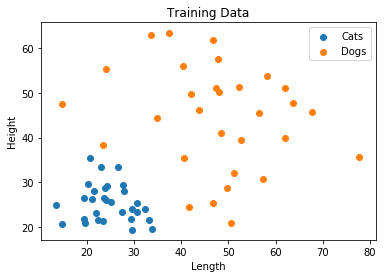

In [19]:
# Plotting Training Data
plt.scatter(cats[0], cats[1], label='Cats')
plt.scatter(dogs[0], dogs[1], label='Dogs')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Training Data')
plt.legend()

In [20]:
# Normalizing Training Data (zero mean, std of one)

def norm_center(x):
    means = np.mean(x, axis=1).reshape(2,1)
    std = np.std(x)
    norm_centered = (x - means) / std
    return norm_centered

training_data = np.concatenate((cats, dogs), axis=1)
training_data_normed = norm_center(training_data)
normed_cats = training_data_normed[:,0:sample_size]
normed_dogs = training_data_normed[:,sample_size:]

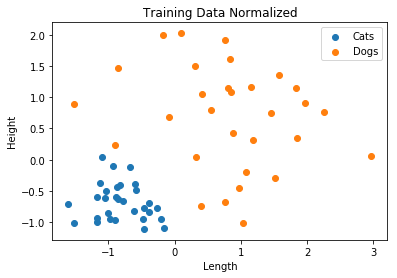

In [21]:
# Plot again to see whether scaling worked as expected

plt.scatter(normed_cats[0], normed_cats[1], label='Cats')
plt.scatter(normed_dogs[0], normed_dogs[1], label='Dogs')
plt.xlabel('Length')
plt.ylabel('Height')
plt.title('Training Data Normalized')
plt.legend()

##### Part 5
A good choice for the activation function is the tanh (because it is differentiable and distinguishes two categories -1, 1).
Numpy implements this function (see below)

In [22]:
# Target values: (-1 are cats, 1 are dogs)
y = np.ones(2*sample_size).reshape(1, 2*sample_size)
y[0,0:sample_size] = -1

##### Part 6:
Forward Propagation

In [23]:
def forward_propagation(x, w): # x will be a 2*unkown matrix, w is a 2*1 matrix
    drive = np.dot(x.T, w)  # an unkown*1 matrix
    y = np.tanh(drive) # still unkown*1 matrix
    return y.T

def make_batch(x, indeces):
    indeces = np.array(indeces)
    batch = x[:, indeces]
    assert batch.shape[1] == len(indeces)
    return batch

w = np.array([1,3.5]).reshape(2,1) #We use different initial weights to make it a bit harder. (I think lukas made the weights for sigmoid activation not tanh)

##### Part 7:
Loss

In [24]:
def loss(y, y_hat):
    l = 0.5*np.sum((y-y_hat)**2)
    return l

##### Part 8:
Gradient of loss w.r.t the weights:
## $\frac{\partial loss}{\partial w} = (y - \hat{y}) \frac{\partial -\hat{y}}{\partial w} = (y - \hat{y}) (- \sigma'(x^Tw) x^T) $

In [25]:
def gradient(x, y, w):
    drive = np.dot(x.T, w)
    y_hat = np.tanh(drive).T
    assert y_hat.shape[0] == 1
    grad = np.dot((y - y_hat) * (-1) * (1-np.tanh(drive.T)**2),  x.T) # the derivative of tanh(x) is 1- tanh^2(x)
    assert grad.shape[1] == 2
    return grad.T

##### Part 9:
Actual Gradient Descent with lots of plots :)

In [26]:
def train(x, y, init_w, learning_rate, batch_size=2, training_steps=100):
    losses = [] # remember the losses in here
    remembered_ws = np.zeros((2,training_steps+1)) # remember weights in here
    remembered_ws[:,0] = init_w.reshape(2,)
    w = init_w
    sample_size = x.shape[1]
    for i in range(training_steps): # this is the training loop
        indeces = np.array(random.sample(range(sample_size), batch_size)) # get some random indeces without replacement for making the batches
        x_batch = make_batch(x, indeces)
        y_batch = make_batch(y, indeces)
        y_hat = forward_propagation(x_batch, w) #get network output
        losses.append(loss(y_batch, y_hat))
        grad = gradient(x_batch,y_batch, w) # calculate the gradient
        w_new = w - learning_rate * grad
        remembered_ws[:,i+1]=w_new.reshape(2,)
        w = w_new
    return losses, remembered_ws

In [27]:
def plot_loss(): # Function to plot loss over time
    plt.plot(np.arange(len(losses)), losses)
    plt.title('The loss over time')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')

In [28]:
def compute_all_losses(): # compute all losses in a grid. We need it for the contour plots
    n_weights = 100
    w_1 = np.linspace(0.8, 4, n_weights)
    w_2 = np.linspace(0.8, 4, n_weights)
    ww1, ww2 = np.meshgrid(w_1, w_2) # getting all different combinations
    losses = np.zeros((n_weights,n_weights))
    for i, (xs, ys) in enumerate(zip(ww1, ww2)):
        for j, (w1, w2) in enumerate(zip(xs, ys)):
            y_hat = forward_propagation(training_data_normed, np.array([w1,w2]).reshape(2,1)) # get the individual network prediction
            losses[i,j] = loss(y, y_hat) # and save the loss
    return ww1, ww2, losses

In [29]:
def plot_contour(): # plot the error contours calculated with function above
    xx, yy, losses = compute_all_losses()
    plt.figure()
    plt.contourf(xx, yy, losses)
    plt.plot(ws[0], ws[1])
    plt.plot(ws[0,0], ws[1,0], 'or')
    plt.colorbar()
    plt.xlabel('Weight 1')
    plt.ylabel('Weight 2')
    plt.title('Weight path visualized in weight space (color indicates loss)')

### Stochastic Gradient Descent:

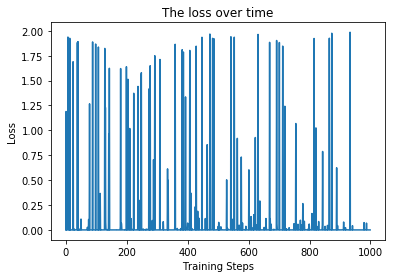

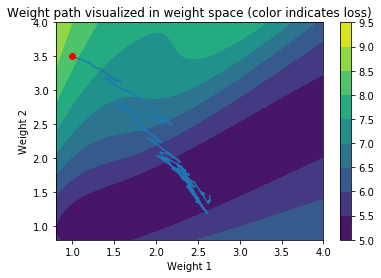

In [37]:
learning_rate = 0.2
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=1, training_steps=1000)
plot_loss()
plot_contour()
# Funny enough loss spikes (i.e. only sometimes we get a very wrongly classified sample)
# But batch might be better

### Full Batch mode:

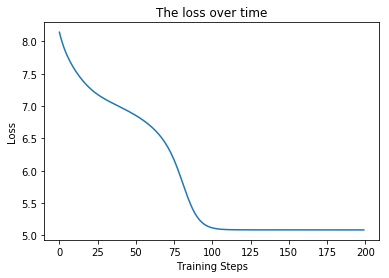

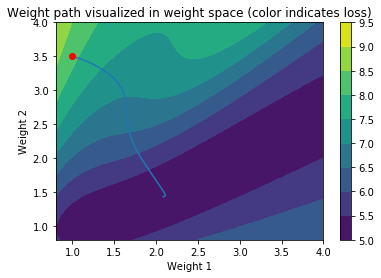

In [38]:
learning_rate = 0.02
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=60, training_steps=200)
plot_loss()
plot_contour()
# Full batch is very smooth and gives stable approximation behaviour

### Mini Batch Mode:

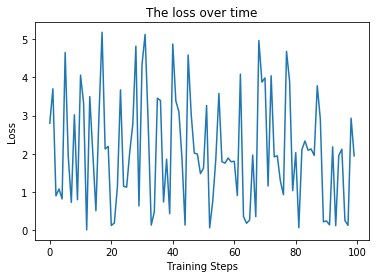

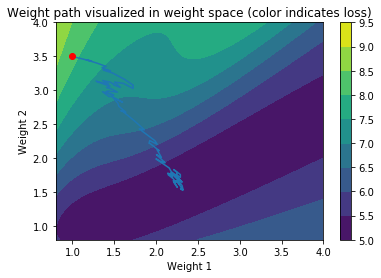

In [39]:
learning_rate = 0.09
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=20, training_steps=100)
plot_loss()
plot_contour()
# seems ok tradeoff

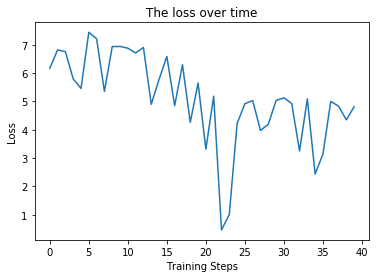

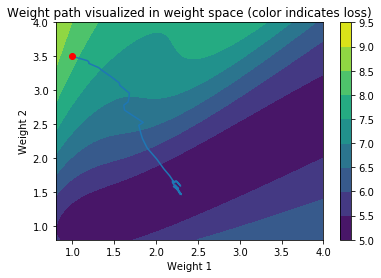

In [41]:
# Mini-Batch Mode
learning_rate = 0.09
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=50, training_steps=40)
plot_loss()
plot_contour()
# seems good tradeoff
# Bigger minibatch is better here

In [42]:
# Big Minibatch seems to be ok. Let's play with learning rates:

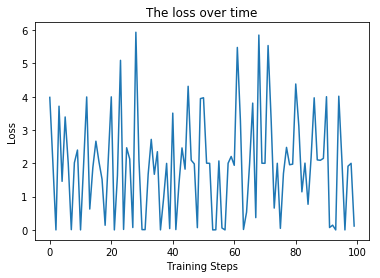

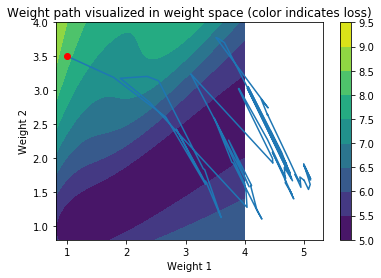

In [43]:
learning_rate = 0.8
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=20, training_steps=100)
plot_loss()
plot_contour()
#way to big :D

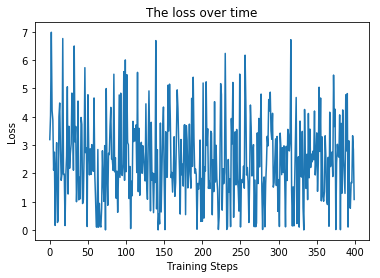

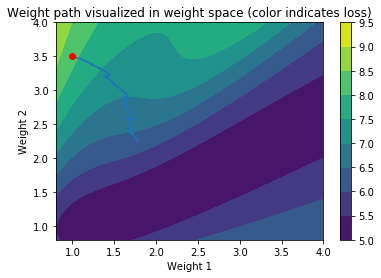

In [44]:
learning_rate = 0.01
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=20, training_steps=400)
plot_loss()
plot_contour()
# to small; convergence takes ages

In [40]:
# We conclude that big minibatches are ok, but in this case with such a small number of data in total actually full batch works very well too.

#### Excercise 4:
Reading Papers

#### Excercise 5:
Momentum! :)   
So momentum basically means, that we keep some of the direction in which we changed the weights the lase time for this time. Therefore hopefully not getting stuck in local minima so easily. Also it is supposed to speed up convergence while going always in the same direction.
So it is just like physical momentum.

In [46]:
# we don't need much additional code. Just keeping track of the old directions of the gradient
def train(x, y, init_w, learning_rate, batch_size=2, training_steps=100):
    losses = []
    remembered_ws = np.zeros((2,training_steps+1))
    remembered_ws[:,0] = init_w.reshape(2,)
    w = init_w
    momentum = np.array([0,0]).reshape(2,1)
    for i in range(training_steps):
        sample_size = x.shape[1]
        indeces = np.array(random.sample(range(sample_size), batch_size))
        x_batch = make_batch(x, indeces)
        y_batch = make_batch(y, indeces)
        y_hat = forward_propagation(x_batch, w)
        losses.append(loss(y_batch, y_hat))
        grad = gradient(x_batch,y_batch, w)
        w_new = w - learning_rate * grad + learning_rate * momentum
        momentum_rate = 0.8 # we fix the momentum rate for this excercise as there are too many hyperparameters already anyway.
        momentum = momentum_rate *(momentum) - grad
        remembered_ws[:,i+1]=w_new.reshape(2,)
        w = w_new
    return losses, remembered_ws

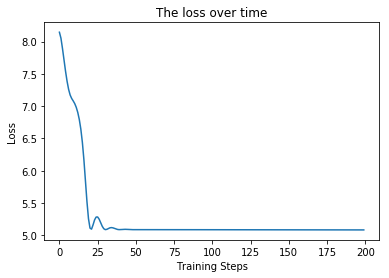

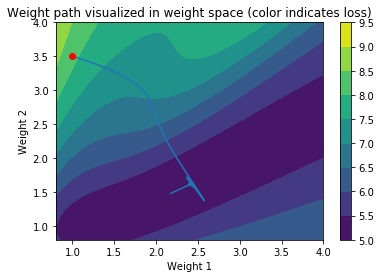

In [47]:
learning_rate = 0.02
losses, ws = train(training_data_normed, y, w, learning_rate, batch_size=60, training_steps=200)
plot_loss()
plot_contour()

BOOM! Momentum actually decreased our epochs needed for convergence dramatically! It's down to 22 or so now, compared to 100 in Full Batch mode further up. But you can see a little overshoot instead.

We put a lot of time into this homework and did all the Optionals. So if you like our work, please consider grading us with "outstanding" :)